# Apresentação

Esse notebook demonstra o balanceamento de reações químicas utilizando o princípio de estequiometria de reação. Após completar esse notebook, você deverá saber 

* a definição de coeficiente estequiométrico,
* a reação é *balanceada* quando o número de espécies atômicas e a carga elétrica são conservadas na reação,
* como resolver coeficientes estequiométricos na mão, 
* como resolver coeficientes estequiométricos através de um sistema linear de equações. 

# Estequiometria

Estequiometrica é a análise quantitativa de reações químicas. A estequiometria provê um conjunto de ferramentasa analíticas essenciais para a formulação de processos químicos. Um dos cálculos básicos de estequiometrica é o balanço de uma reação química. 

O próximo vídeo faz uma revisão do que você já aprendeu sobre métodos de balanceamento de reações. 


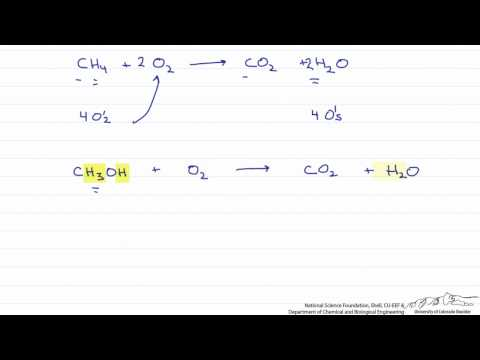

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("e8cUyGBt8e8",560,315,start=0,end=108,rel=0)

Em aplicações de processos e bioengenharia, no entanto, nós lidamos frequentemente com um conjunto grande e complexo de reações. Para essas aplicações, é importante ter uma abordagem mais estruturada que seja solucionável via computador em um tempo aceitável.


## Coeficientes Estequiométricos

Uma reação química é comumentemente expressa por

$$ a\,A + b\,B \longrightarrow c\,C + d\,D $$

onde $A$, $B$, $C$, e $D$ são espécies moleculares envolvidas na reação e os coeficientes $a$, $b$, $c$, e $d$ indicam a quantidade molar de cada espécies em cada lado da reação. Por convenção, os coeficientes $a$, $b$, $c$, e $d$ são todos números positivos. Os reagentes estão no lado esquerdo da reação, e os produtos no lado direito.

Uma reação *balanceada* mostra a identidade molecular dos compostos envolvidos. Os coeficientes estequiométricos  

1. mostram a quantidade molar dos compostos envolvidos na reação, 
2. conservam o número total de cada tipo de átomo entre reagentes e produtos, 
3. conservam a carga elétrica total, e
4. conservam a massa.

A última propriedade, a conservação de massa em uma reação química balanceada, é uma consequência da conservação das espécies atômicas. 

Uma convenção alternativa de expressar uma reação balanceada é 

$$ \nu_A\,A + \nu_B\,B + \nu_C\,C + \nu_D\,D = 0 $$

onde os coeficientes estequiométricos$\nu_A$, $\nu_B$, $\nu_C$, e $\nu_D$ podem assumir valores positivos e negativos. Coeficientes negativos correspondem aos reagentes e positivos aos produtos. 

A vantagem dessa notação fica mais clara quando mostrar a você como resolver o sistema de equações algébricas correspondente às condições para uma reação balanceada. 

## Exemplos

### Combustão do Metano

A reação desbalanceada de combustão do metano (\\( CH_4\\) ) é

$$ CH_4 + O_2 \rightarrow CO_2 + H_2O $$

O que buscamos são os coeficientes estequiométricos para a reação balanceada. Os coeficientes estequiométricos são números \\(\nu_s\\) associados a cada espécie $s$ de modo que a expressão química possa ser escrita pela fórmula 

$$ \nu_{CH_4}CH_4 + \nu_{O_2}O_2 + \nu_{CO_2}CO_2 + \nu_{H_2O}H_2O = 0  $$

Coeficientes estequiométricos negativos correspondem as reagentes, enquanto que os coeficientes positivos referem-se aos produtos da reação. Os coeficientes estequiométricos **devem** conservar o número de átomos de cada elemento que aparece na reacão e também a carga elétrica se a reacão envolver espécies iônicas. 

Um modo de computar os coeficientes estequiométricos é por meio da biblioteca [SymPy](http://sympy.org/en/index.html) que faz uso de cálculo simbólico para montar e resolver o balanço de átomos e de cargas correspondentes à reação química.

Para a solução, o primeiro passo é importar o pacote Sympy no ambiente de trabalho. Depois, deve-se introduzir o coeficiente estequiométrico para cada espécie química participante da reação, e uma lista de balanços de átomos em termos dos coeficientes. Existe um balanço de átomos para cada espécies atômica participante da reacão. Cada balanço de átomos consiste de uma expressão que será igual a zero para resultar numa reação balanceada. 

In [ ]:
import sympy

sympy.var(['vCH4', 'vO2', 'vCO2', 'vH2O'])

atomBalances = [
    sympy.Eq(vCH4 + vCO2,0),             # Carbon
    sympy.Eq(4*vCH4 + 2*vH2O,0),         # Hydrogen
    sympy.Eq(2*vO2 + +2*vCO2 + vH2O,0)   # Oxygen
]

for eqn in atomBalances:
    print(eqn)

Uma única solução é obtida especificando a **base de cálculo**. A base de cálculo é uma equação adicional que determina o coeficiente estequiométrico para uma espécie particular. Nesse caso, uma vez que o exempo refere-se à combustão do metado, uma base de cálculo óbvia é setar o coeficiente estequiométrico do metano como **-1**. 

In [ ]:
basis = [sympy.Eq(vCH4,-1)]

for eqn in atomBalances + basis:
    print(eqn)

sympy.solve(atomBalances + basis)

### Reação hipergólica de monometilhidrazina e tetraóxido de nitrogênio

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Methylhydrazine-3D-balls.png/190px-Methylhydrazine-3D-balls.png)

Reações hipergólicas são reações onde os reagentes sofrem ignição espontânea. Eles são frequentemente usados em propulsão espacial onde é desejável ter um propulsor que possa ser prontamente controlado em uma variedade de condições operacionais.

Um exemplo é a reacão do combustível [monometilhidrazina (MMH)](https://en.wikipedia.org/wiki/Monomethylhydrazine) com o oxidante tetraóxido de nitrogênio que é usado no motor SuperDraco desenvolvido pela SpaceX e na reação do sistema de controle e de sistemas de manobras orbitais do ônibus espacial. 

A reação **desbalanceada** é dada por

$$ CH_6N_2 + N_2O_4 \rightarrow CO_2 + NO + H_2O $$

Determine os coeficientes estequiométricos da reação balanceada. Quanto oxidante é requerido por kg de combustível? 

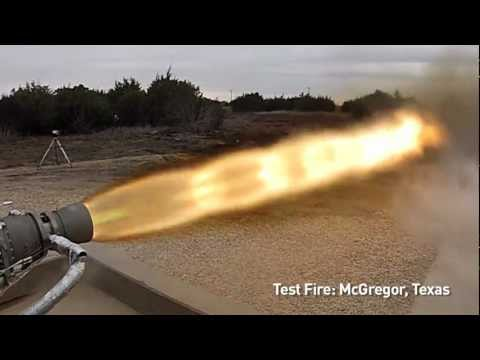

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("VP_kGlmOH9U",560,315,start=0,end=108,rel=0)

### Reação com carga em solução aquosa

Cadmio metálico ($Cd$) é dissolvido em uma solução concentrada de ácido nítrico para formar o íon $Cd^{+2}$ com a produção do radical livre óxido nítrico ($NO$). 

A apresentação do problema sugere que a reação desbalanceada corresponda a 

$$Cd + NO_3^- \longrightarrow Cd^{+2} + NO$$

mas claramente isso não pode ser balanceado porque não há cargas negativas no lado direito da equação. Em problemas como este, é preciso incorporar outros íons e água na reação. Para este caso, há um total de oito espécies moleculares a serem consideradas:

$$Cd,\ H_2O,\ HNO_3,\ NO,\ Cd^{+2},\ H^+,\ OH^-,\ NO_3^-$$

Em seguida, anotamos os balanços atômicos (4), balanço de carga (1) e especificação de base de cálculo (1) para criar uma lista de seis equações correspondendo aos oito coeficientes estequiométicos.

In [ ]:
# Identify unknown stoichiometric coefficients
v = sympy.var(['vCd','vH2O','vHNO3','vNO','vCdpos2','vHpos','vOHneg','vNO3neg'])

# Atom balances
eqns = [
    sympy.Eq(vCd + vCdpos2, 0),                             # Cadmium
    sympy.Eq(2*vH2O + vHNO3 + vHpos + vOHneg, 0),           # Hydrogen
    sympy.Eq(vH2O + 3*vHNO3 + vNO + vOHneg + 3*vNO3neg, 0), # Oxygen
    sympy.Eq(vHNO3  + vNO + vNO3neg, 0)                     # Nitrogen
]

# Charge balance
eqns.append(sympy.Eq(2*vCdpos2 + vHpos - vOHneg - vNO3neg, 0))

# Basis
eqns.append(sympy.Eq(vCd, -1))

for eqn in eqns:
    print(eqn)

Este problema tem mais variáveis do que equações, então existem alguns _graus de liberdade_. Precisamos fazer algumas suposições adicionais sobre essa reação para resolver esses graus de liberdade. A primeira suposição é que o ácido nítrico está completamente dissociado em solução de modo que $\nu_{HNO_3}=0$.

In [ ]:
eqns.append(sympy.Eq(vHNO3, 0))

for eqn in eqns:
    print(eqn)
    
sympy.solve(eqns)

Esta solução parcial mostra que os seis coeficientes estequiométricos restantes podem ser escritos em termos de $\nu_{OH^-}$. O que está acontecendo é que há uma segunda reação, a dissociação da água

$$H_2O \longrightarrow H^+ + OH^-$$

que está ocorrendo entre a mesma lista de reagentes. Para separar as duas reações, definimos $\nu_{H_2O} = 0$

In [ ]:
sympy.solve(eqns + [sympy.Eq(vH2O,0)])

que fornece como resultado a seguinte reação **balanceada** 

$$ Cd + \frac{4}{3}\,H^+ + \frac{2}{3}\,NO_3^- \longrightarrow Cd^{+2} + \frac{4}{3}\,OH^- + \frac{2}{3}\,NO $$

### Combustão do Octano

Faça o balanceamento da reação de combustão do octano $C_8H_{18}$.